# Multiple Linear Regression
Our original data only had a single input and corresponding output. What if we wanted to add more variables to our data? Maybe we think more people come to order pizza when the weather is warmer. Who knows?

Let's focus on Multiple Linear Regression.

We're gonna use more features of NumPy, including things like matrix operations. Becuase this portion is math heavy, it's considered to be the most difficult part of the course. Let's see how it goes. 

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import seaborn as sns

x1, x2, x3, y = np.loadtxt("./pizza_data_4_col.txt", skiprows=1, unpack=True)

# Weights from training phase, supposedly
w = np.array([-3.98230894, 0.37333539, 1.69202346])


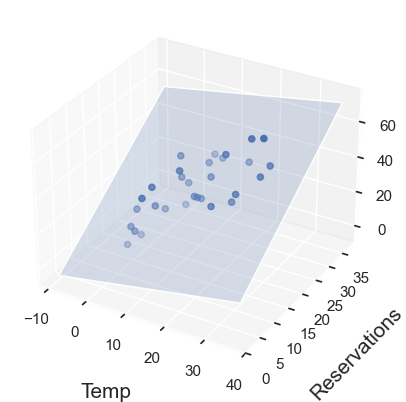

In [61]:
# Our new data set contains a new column, temperature. This references the temperature of the given day in celcius.

# Now that we've added another set of inputs, the graph will look like this:
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel("Temp", labelpad=15, fontsize=15)
ax.set_ylabel("Reservations", labelpad=15, fontsize=15)
ax.set_zlabel("Pizzas", labelpad=15, fontsize=15)

ax.scatter3D(x1, x2, y, color='b')

MARGIN = 10
edges_x = [np.min(x1) - MARGIN, np.max(x1) + MARGIN]
edges_y = [np.min(x2) - MARGIN, np.max(x2) + MARGIN]
xs, ys = np.meshgrid(edges_x, edges_y)
zs = np.array([w[0] + x * w[1] + y * w[2] for x, y in
              zip(np.ravel(xs), np.ravel(ys))])
ax.plot_surface(xs, ys, zs.reshape((2, 2)), alpha=0.2)

plt.show()

## More weights?
Yeah, more weights. One for each new input. It would make sense for different inputs to effect the output differently from one another. The formula would start to look something like this:

y-hat = x_sub1 * w_sub1 + x_sub2 * w_sub2 + ... + x_subn + w_subn + b

This is called the weighted sum of the inputs. Try it out when you add another column to the data set.

While it may be difficult to imagine more than 3 dimensions, math can handle hyperspaces fine.

## Matrices and stuff
**Bet ya haven't seen this in a while ;)**
A matrix is a 2D array. A (4,3) matrix is a 4 row, 3 column array. In machine learning, there's two operations that are used:
1. Matrix multiplication
2. Matrix transpose

## Matrix multiplication
Matrix multiplication is the reason you need a beefy setup. To perform multiplication, two matrices can only be multiplied together if the second matrix has THE SAME NUMBER of rows as the number of columns on the first matrix.
- OK ex:
 - A: (4, 3), B: (3, 2)
       o  i       i  o
  i is the dimension we want to ensure is equal
  o is the the new matrix that will be formed as a result of multiplication
    In this case, we'll get a (4,2) matrix as a result

An example with a (1,3) and a (3, 1) matrix, which results in a (1, 1) matrix:
- A: [2, 3, 5]
- B: [2.5,
      4,
      1]
Our result = (2 * 2.5) + (3 * 4) + (5 * 1) = [22]

For larger matrices, the new matrix will look like this:
- m3[i][j] = m1[i] * m2[j]

### Huh??
Okay, let's work through these two matrices:
- A (4, 3): [2, 3, 5,
      11, 13, 19,
      31, 27, 1,
      -3, 14, 9]
  B (3,2): [2.5, -3,
      4, 12,
      1, 2]

- C (4,2):
 - (0, 0) = (A[0][0] * B[0][0]) + (A[0][1] * B[1, 0]) + (A[0][2] * B[2][0])
  = (2 * 2.5) + (3 * 4) + (5 * 1) = 22

 - (0, 1) = (A[0][0] * B[0][1]) + (A[0][1] * B[1][1]) + (A[0][2] * B[2][1])
  = (2 * -3) + (3 * 12) + (5 * 2) = 40

 - (1, 0) = (A[1][0] * B[0][0]) + (A[1][1] * B[1][0]) + (A[1][2] * B[2][0])
  = (11 * 2.5) + (13 * 4) + (19 * 1) = 98.5

 - (1, 1) = (A[1][0] * B[0][1]) + (A[1][1] * B[1][1]) + (A[1][2] * B[2][1])
  = (11 * -3) + (13 * 12) + (19 * 2) = 161

 - (2, 0) = (A[2][0] * B[0][0]) + (A[2][1] * B[1][0]) + (A[2][2] * B[2][0])
  = (31 * 2.5) + (27 * 4) + (1 * 1) = 186.5

 - (2, 1) = (A[2][0] * B[0][1]) + (A[2][1] * B[1][1]) + (A[2][2] * B[2][1])
  = (31 * -3) + (27 * 12) + (1 * 2) = 233

...

Wow, that's a lot of stuff to do by hand. Let's see if we can program this instead


In [62]:
# A (4,3) matrix
a = [[2, 3, 5],
     [11, 13, 19],
     [31, 27, 1],
     [-3, 14, 9]]
# A (3,2) matrix
b = [[2.5, -3],
     [4, 12],
     [1, 2]]

c = []

# This is a lot easier than implementing some kind of loop
a = np.matrix(a)
b = np.matrix(b)
c = a * b

print(c)



[[ 22.   40. ]
 [ 98.5 161. ]
 [186.5 233. ]
 [ 57.5 195. ]]


# Matrix Transpose
It's basically diagonally flipping the matrix. First, flip the matrix across the vertical axis, then rotate the matrix -90 degrees / CCW 90 degrees

B (2,3):
  [[2.5, -3],
  [4, 12],
  [1, 2]]

=> B (3,2):
  [[2.5, 4, 1],
  [-3, 12, 2]]

In [63]:
# You can do this easily with NP
print("Normal:\n%s\nTransposed:\n%s " % (b, np.transpose(b)))


Normal:
[[ 2.5 -3. ]
 [ 4.  12. ]
 [ 1.   2. ]]
Transposed:
[[ 2.5  4.   1. ]
 [-3.  12.   2. ]] 


In [64]:
'''
Time to continue with updating the model. We've already update our data in the second cell of this notebook. Let's play around with the shape of our data
'''
# Dimensions of a matrix. If it's a hanging comma, it's a single dimension
print("Single dimension: ", x1.shape)
print("Multidimension: ", a.shape)

Single dimension:  (30,)
Multidimension:  (4, 3)


In [65]:
# We're going to make the X matrix using the provided inputs x1, x2, and x3
X = np.column_stack((x1, x2, x3))
X.shape # This should now be a (30, 3) dimensional matrix
X
# First five rows, or a shortcut for 0 to 5 exclusive
X[:5]

array([[13., 26.,  9.],
       [ 2., 14.,  6.],
       [14., 20.,  3.],
       [23., 25.,  9.],
       [13., 24.,  8.]])

In [66]:
# We should always reshape a 1-dimension array if we're working with multidimensional matrices
Y = y.reshape(-1, 1)
Y.shape


(30, 1)

In [67]:
# Here we'll update the weights initialized as zeros
# We're making a matrix (m, n)  where m is the col size of X, and n is 1 for a single dimension
w = np.zeros((X.shape[1], 1))
w.shape, w


# Now we update the prediction function
def predict_matrix(X, w):
  return np.matmul(X, w)

# predict_matrix(X, w)

# Update the loss function
def loss_matrix(X, Y, w):
  return np.average((predict_matrix(X, w) - Y) ** 2)

loss_matrix(X, Y, w)

# Finally, update the gradient function
def gradient_matrix(X, Y, w):
  # X.T is shorhand for transpose X
  # X.shape[0] is the m dimension of X, aka rows
  return 2 * np.matmul(X.T, (predict_matrix(X, w) - Y )) / X.shape[0]

# gradient_matrix(X, Y, w)


In [93]:
# Now, let's update the training model and begin training
def train_matrix(X, Y, iterations, lr, verbose = True):
  # Reinitializing w
  w = np.zeros((X.shape[1], 1))
  for i in range(iterations):
    if(i == 0 or i == iterations - 1):
      print("Iteration %4d => Loss: %.20f" % (i, loss_matrix(X, Y, w)))
    w -= gradient_matrix(X, Y, w) * lr
  return w

# We don't want to forget our bias, so make sure to add it in as a new row to our input data
bias = np.ones(X.shape[0])
X = np.column_stack((bias, x1, x2, x3))
# If we view X, we should now see a new column of 1s added to the matrix
X
w = train_matrix(X, Y, 50000, 0.001)

# Now we can predict something!
print("Weight:\n%s" % w.T)
print("Some pizza predictions:\n")
test_input = np.matrix([1, 5, 25, 3])
test_output = [23]
print("The example numbers I made up\n----------")
print("%s reservations; %sC; %s tourists -> \nPredicted %.4f pizzas \nActual: %d pizzas\n" % (test_input.item(1),
                                                                                            test_input.item(2),
                                                                                            test_input.item(3),
                                                                                            predict_matrix(test_input[0], w), test_output[0]))

print("From the data set\n----------")
for i in range(5):
  # print("X[%d] -> %.4f (label: %d)" % (i, predict_matrix(X[i], w), Y[i]))
  print("%s reservations; %sC; %s tourists -> \nPredicted %.4f pizzas \nActual: %d pizzas\n" % (X[i].item(1), X[i].item(2), X[i].item(3), predict_matrix(X[i], w), Y[i]))


Iteration    0 => Loss: 1333.56666666666660603369
Iteration 49999 => Loss: 6.69842302131396571951
Weight:
[[ 2.32966172  1.23135282 -0.02111842  3.12372705]]
Some pizza predictions:

The example numbers I made up
----------
5 reservations; 25C; 3 tourists -> 
Predicted 17.3296 pizzas 
Actual: 23 pizzas

From the data set
----------
13.0 reservations; 26.0C; 9.0 tourists -> 
Predicted 45.9017 pizzas 
Actual: 44 pizzas

2.0 reservations; 14.0C; 6.0 tourists -> 
Predicted 23.2391 pizzas 
Actual: 23 pizzas

14.0 reservations; 20.0C; 3.0 tourists -> 
Predicted 28.5174 pizzas 
Actual: 28 pizzas

23.0 reservations; 25.0C; 9.0 tourists -> 
Predicted 58.2364 pizzas 
Actual: 60 pizzas

13.0 reservations; 24.0C; 8.0 tourists -> 
Predicted 42.8202 pizzas 
Actual: 42 pizzas



C:\Users\Tap\AppData\Local\Temp\ipykernel_10636\2313638535.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("%s reservations; %sC; %s tourists -> \nPredicted %.4f pizzas \nActual: %d pizzas\n" % (test_input.item(1),
C:\Users\Tap\AppData\Local\Temp\ipykernel_10636\2313638535.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("%s reservations; %sC; %s tourists -> \nPredicted %.4f pizzas \nActual: %d pizzas\n" % (X[i].item(1), X[i].item(2), X[i].item(3), predict_matrix(X[i], w), Y[i]))


## Summary of results
Above, we can see the weights for how each category affects the results. The tourist weight holds the most value, whereas the temperature outside does little to affect sales of pizza. Pretty cool, huh?

With the new model above, it can now work with more generic sets of data. It doesn't have to be a set of data with three types of inputs, it can be however many inputs now.